In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#lendo a imagem como binária
img = cv2.imread('horse.png', cv2.IMREAD_GRAYSCALE)
_, binario = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY_INV)  # objeto = 1, fundo = 0

In [3]:
#máscaras do afinamento
kernel_sets = [
    np.array([[ 0,  0,  0],
              [-1,  1, -1],
              [ 1,  1,  1]], dtype=np.int8),

    np.array([[-1,  0,  0],
              [ 1,  1,  0],
              [-1,  1, -1]], dtype=np.int8),

    np.array([[ 1, -1,  0],
              [ 1,  1,  0],
              [ 1, -1,  0]], dtype=np.int8),

    np.array([[-1,  1, -1],
              [ 1,  1,  0],
              [ 0,  0,  0]], dtype=np.int8),

    np.array([[ 1,  1,  1],
              [-1,  1, -1],
              [ 0,  0,  0]], dtype=np.int8),

    np.array([[-1,  1, -1],
              [ 0,  1,  1],
              [ 0,  0, -1]], dtype=np.int8),

    np.array([[ 0, -1,  1],
              [ 0,  1,  1],
              [ 0, -1,  1]], dtype=np.int8),

    np.array([[ 0,  0, -1],
              [ 0,  1,  1],
              [-1,  1, -1]], dtype=np.int8)
]

In [4]:
def hit_or_miss(img, kernel):
    #Aplica a operação Hit-or-Miss com suporte a 'don't care' (-1)
    # Parte de foreground
    fg = (kernel == 1).astype(np.uint8)
    bg = (kernel == 0).astype(np.uint8)
    # Aplicar erosão no foreground
    eroded_fg = cv2.erode(img, fg, borderType=cv2.BORDER_CONSTANT, borderValue=0)
    # Aplicar erosão no background (1 - img)
    eroded_bg = cv2.erode(1 - img, bg, borderType=cv2.BORDER_CONSTANT, borderValue=0)

    return eroded_fg & eroded_bg

In [6]:
curr = binario.copy()
while True:
    updated = curr.copy()
    for kernel in kernel_sets:
        mask = hit_or_miss(updated, kernel)
        curr = curr & (~mask)
    if np.array_equal(curr, updated):
        break

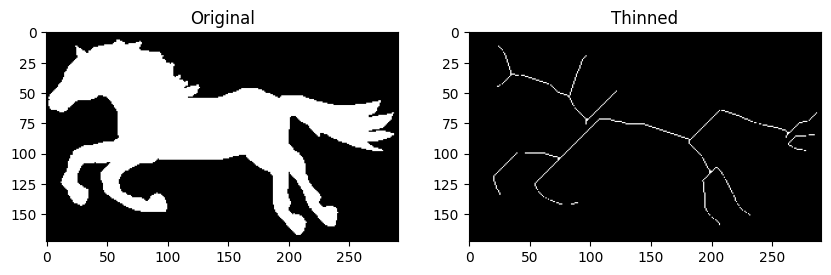

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(binario, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Thinned")
plt.imshow(curr, cmap='gray')
plt.show()